##### <img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center><b>Bachelor of Ecole Polytechnique</b></center>
<center>MAA106: Introduction to Numerical Analysis, year 1, semester 2</center>
<center>Maxime Breden</center>
  

# Introduction to Computational Mathematics


&nbsp;

<img src="./figures/ApproxPi.png" alt="Pi" style="width: 800px;"/>

&nbsp;

In [1]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
plt.rcParams.update({'font.size': 50})
import numpy as np              # package for scientific computing  

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)

<a id="intro"></a>
## Introduction

We will deal with two different types of approximation

- Mathematical approximation, or **truncation errors**.

\begin{equation*}
e^x \approx 1 + x +\frac{x^2}{2} \qquad{}\text{or}\qquad{} f'(x) \approx \frac{f(x+h)-f(x)}{h} 
\end{equation*}

- Approximations made by the computer, or **rounding errors**.

In [3]:
x = sqrt(2) 
y = x*x
print(y)

2.0000000000000004


<div  markdown=1 class="Def">
If $x$ is an approximation of $x^*$,   

- the **absolute error** between $x$ and $x^*$ is $\left|\,x-x^*\right|$.
- the **relative error** between $x$ and $x^*$ is $\displaystyle\frac{\left|\,x-x^*\right|}{|\,x^*\,|}$.

<div markdown=1 class="Ex">
Take

\begin{equation*}
x=11,\ x^*=10 \quad{}\text{and}\quad{} y=1001,\ y^*=1000.
\end{equation*}

In both cases, the absolute error is $1$, but one might consider that $y$ approximates $y^*$ more accurately than $x$ does $x^*$. This is reflected in the relative error:

\begin{equation*}
\frac{\left|\,x-x^*\right|}{|\,x^*\,|} = 0.1 \qquad{} \frac{\left|\,y-y^*\right|}{|\,y^*\,|} = 0.001.
\end{equation*}

<a id="RoundOff"></a>
## Machine representation of numbers: rounding errors

<img src="figures/Zuse_z3.jpg" alt="Zuse" style="width: 300px;"/>
  
>**Konrad Zuse (1910-1995) and the Z3-computer (1941).**

In [4]:
x = sqrt(2)
y = x**2
print(y)

2.0000000000000004


### Machine representation of numbers

<div  markdown=1 class="Ex"> The decimal system (or base-10 system).

\begin{equation*}
[1000]_{10} = 1\times 10^3
\end{equation*}

\begin{equation*}
[6743.7]_{10} = 6\times 10^3 + 7\times 10^2 +4\times 10^1 + 3\times 10^0 + 7\times 10^{-1}
\end{equation*}


<div  markdown=1 class="Ex"> The binary system (or base-2 system).

\begin{equation*}
[1000]_{2} = 1\times 2^3
\end{equation*}

\begin{equation*}
[1011.1]_{2} = 1\times 2^3 + 0\times 2^2 +1\times 2^1 + 1\times 2^0 + 1\times 2^{-1} \quad(= [11.5]_{10})
\end{equation*}

<div  markdown=1 class="Def">

**Normalized exponent representation in base 10.**

A real number $x$ can be written as

$$
x=(-1)^{s_a} \times [0.a]_{10} \times 10^{(-1)^{s_b}\ [b]_{10}} \nonumber
$$

where the first digit of $a$ is different from $0$, and $b$ is an integer.


<div  markdown=1 class="Ex"> \begin{align*}
-0.0047258 = -0.47258\times 10^{-2}  =(-1)^{\color{red}1} \times 0.\color{red}{47258}\times 10^{(-1)^{\color{red}1} \times {\color{red}2}}
\end{align*}

<div  markdown=1 class="Ex"> \begin{align*}
\frac{10}{3} = 3.3333333\ldots = (-1)^\color{red}{0} \times 0.\color{red}{33333333\ldots} \times 10^{(-1)^\color{red}{0} \times \color{red}{1}}
\end{align*}

<div  markdown=1 class="Def">

**Machine numbers.**

Let $m$ and $n$ be given integers. A *machine number* is a real number $x$ as above, with the length of $a$ and $b$ respectively lower than $m$ and $n$. It can be exaclty represented by the follwing word of size $N=n+m+2$:
 
$$|\quad{} s_a \quad{}|\quad{} a \quad{}|\quad{} s_b\quad{}|\quad{} b \quad{}| \nonumber$$

<div  markdown=1 class="Ex"> Take $(m,n)=(5,2)$

\begin{align*}
-0.0047258 =(-1)^{\color{red}1} \times 0.\color{red}{47258}\times 10^{(-1)^{\color{red}1} \times {\color{red}2}} \quad{}\text{is a machine number}
\end{align*}

$$|\quad{} 1 \quad{}|\quad{} 47258 \quad{}|\quad{} 1\quad{}|\quad{} 02 \quad{}| \nonumber$$

<div  markdown=1 class="Ex"> Take $(m,n)=(5,2)$

\begin{align*}
\frac{10}{3} = (-1)^\color{red}{0} \times 0.\color{red}{33333333\ldots} \times 10^{(-1)^\color{red}{0} \times \color{red}{1}} \quad{}\text{is NOT a machine number}
\end{align*}


$$|\quad{} 0 \quad{}|\quad{} 33333\color{red}{33\ldots} \quad{}|\quad{} 0\quad{}|\quad{} 01 \quad{}| \nonumber$$


<div  markdown=1 class="Def"> Floating-point representation and rounding error.

- $rd(x)$ is the closest machine number to $x$, called *floating-point* representation of $x$.
- We call $\frac{\vert x-rd(x)\vert }{\vert x\vert}$ the rounding error.
- The smallest $\varepsilon$ such that $\frac{\vert x-rd(x)\vert }{\vert x\vert}\leq \varepsilon\ \forall~x$ is called the *machine precision*.


<div  markdown=1 class="Ex"> Consider $m=5$, $n=2$, and $\pi=3.14159265\ldots$. 

$$rd(\pi)=0.31416\times 10^1  \quad{}\Rightarrow\quad{} |\quad{} 0 \quad{}|\quad{} 31416 \quad{}|\quad{} 0 \quad{}|\quad{} 01 \quad{}|
\nonumber$$

$$
\left|\frac{\pi-rd(\pi)}{\pi}\right| \approx 2.34\times 10^{-6}
\nonumber
$$

In [5]:
print(pi)

3.141592653589793


In [6]:
x = 0.1111111111111111  # 16 ones  
y = 0.11111111111111111 # 17 ones
print('Is x equal to y?', x==y)

Is x equal to y? True


In [7]:
z = 0.111111111111111   # 15 ones
print('Is x equal to z?', x==z)

Is x equal to z? False


In [8]:
lie = 0.1
print(lie)

0.1


<div mardown=1 class='Rmk'>
    
$$
[0.1]_{10} = [0.\underbrace{110011001100\ldots}_{\infty \text{ many times }1100}]_2 \times 2^{-3} \nonumber
$$
    
$$
\text{lie} = rd([0.1]_{10}) = [0.\underbrace{110011001100\ldots}_{\text{only 52 digits}}]_2 \times 2^{-3} \nonumber
$$

### Floating-point arithmetic

<div markdown=1 class='Ex'> 

Are the following numbers machine numbers for $m=5$ and $n=2$?

- $x=3.1416$
- $y=0.00011$
- $s=x+y$

<div markdown=1 class='Answer'> $\qquad{}\qquad{}\qquad{}\qquad{}\qquad{}\qquad{}\qquad{}\qquad{}$

- $x=0.31416\times 10^{01} \quad$ <span style="color:green"> &#9745; <span>
- $y=0.11000\times 10^{-03} \quad$ <span style="color:green"> &#9745; <span>
- $s=x+y = 0.31417\color{red}{1}\times 10^{01} \quad$ <span style="color:red"> &#9746; <span>

<div markdown=1 class='Def'> 

**Floating-point arithmetic (finite-digits arithmetic)**

\begin{align*}
x \oplus y = rd(\, rd(x) + rd(y)\,), &\quad\quad\quad x \ominus y = rd(\, rd(x) - rd(y)\,) \\
x \otimes y = rd(\, rd(x) \times rd(y)\,), &\quad\quad\quad x \oslash y = rd(\, rd(x)\,\, / \,\,rd(y)\,) 
\end{align*}


<div  markdown=1 class="Ex"> For $m=5$ and $n=2$. $\qquad{}\qquad{}\qquad{}$

- $x=3.1416$
- $y=0.00011$
- $s=x+y=3.14171$
- $s_{num}=x\oplus y = rd(x+y) = 3.1417$

\begin{equation*}
\frac{\vert s-s_{num}\vert }{\vert s \vert} \approx 3.18\times 10^{-6}
\end{equation*}

<div  markdown=1 class="Ex"> 

**Addition of a large and a small number.**

- $x=1/3$
- $y=6/7\times 10^4$
- $s=x+y =8571.7619\ldots$

<div markdown=1 class='Answer'> For $m=5$ and $n=2$.

\begin{align*}
rd\left(x\right)&=0.33333\times 10^0\\
rd\left(y\right)&=0.85714\times 10^4
\end{align*}

and

\begin{align*}
x \oplus y
&= rd( 0.33333\times 10^0 + 0.85714\times 10^4) \\
&= rd( 0.85717\color{red}{3333} \times 10^4)\\
&= 8571.7
\end{align*}


<div  markdown=1 class="Ex"> 

**Subtraction of nearly equal numbers.**

- $y=6/7\times 10^4$
- $z=0.85717\times 10^4$
- $t=z-y=0.2714285\ldots$

<div markdown=1 class='Answer'> For $m=5$ and $n=2$.

\begin{align*}
rd\left(y\right)&=0.85714\times 10^4\\
rd\left(z\right)&=0.85717\times 10^4
\end{align*}

and

\begin{align*}
z \ominus y
&= rd( 0.85717\times 10^4 - 0.85714\times 10^4) \\
&= 0.3
\end{align*}

**The relative error with the exact value is quite large $\approx 10\%$**


<div  markdown=1 class="Ex"> The order of operations matters for floating-point arithmetic!

- $x=1/3$
- $y=6/7\times 10^4$
- $s=x+y-y = 0.333333\ldots$

<div markdown=1 class='Answer'>\begin{align*}
s_1 &= \color{red}{\left(x\oplus y\right) \ominus y} \\
&= 0.85717 \times 10^4 \ominus y\\
&= 0.3 \qquad{}\qquad{} (\text{relative error} \approx 10\%)
\end{align*}


<div markdown=1 class='Answer'>\begin{align*}
s_2 &= \color{green}{x\oplus \left(y \ominus y \right)}\\
&= 0.33333  \ominus 0\\
&= 0.33333 \qquad{}\qquad{} (\text{relative error} \approx 0.001\%)
\end{align*}


In [10]:
## x + y - x = y ?

x = 10**15
y = 0.1
s1 = (x + y) - x
s2 = (x - x) + y
s = y
print('s1 =',s1)
print('s2 =',s2)
print('The "exact" answer s =',s)

s1 = 0.125
s2 = 0.1
The "exact" answer s = 0.1


<a id="trunc"></a>
## Mathematical approximations: truncation error

- We ignore rounding errors for the moment and assume that the computer can compute with real numbers exactly.

- In most problems, there is still an important issue: there is no explicit and computable formula for the solution.

- Therefore, we replace the initial problem by an easier one, for which we can actually compute the solution.

- This leads to mathematical approximations, or **truncation errors**, that also have to be controlled.



<div markdown=1 class='Ex'> Approximate computation of a derivative:

- $f$ a given derivable function, but no formula known for $f'$.
- $a$ a given real number. 

**How to approximate $x^* = f'(a)$?**


<img src="./figures/ApproxDer.png" alt="ApproxDer" style="width: 1200px;"/>

<div markdown=1 class='Algo'> Two options:

$$
x_h = \frac{f(a+h)-f(a)}{h} \qquad{}\text{and}\qquad{}
\bar x_h = \frac{f(a+h)-f(a-h)}{2h}. \nonumber
$$


<div  markdown=1 class="Def">

**Truncation error.**

$$e_h=\left|\, f'(a)-x_h \,\right| \qquad{} \text{ and } \qquad{} \bar e_h=\left|\, f'(a)-\bar x_h \,\right|.\nonumber$$

<div markdown=1 class="Qs">

- Does each algorithm converge, meaning that $e_h,\bar e_h \underset{h\to 0}{\longrightarrow}0$ ?
- If yes, can we predict the *rate* or *speed* at which they converge ?
- Can we make some quantitative prediction about the accuracy for a given $h$ ?

In [12]:
def f(x): 
    return x**5

def ApproxDerivative1(f, a, h):
    return (f(a+h) - f(a))/h

def ApproxDerivative2(f, a, h): 
    return (f(a+h) - f(a-h))/(2*h)

In [21]:
a = 1
h = 0.000000000001
x1 = ApproxDerivative1(f, a, h)
x2 = ApproxDerivative2(f, a, h)
print('a =', a, ', h =', h, ', exact value: f\'(1)=5')
print('First algorithm:', x1)
print('Second algorithm:', x2)

a = 1 , h = 1e-12 , exact value: f'(1)=5
First algorithm: 5.000444502911705
Second algorithm: 5.000166947155549


<div markdown=1 class="Qs">

- It looks like $e_h,\bar e_h \underset{h\to 0}{\longrightarrow}0$. Can we prove it? Under which assumptions?
- It also looks like $\bar e_h$ goes to $0$ faster than $e_h$ does. Can we also prove that?

<div markdown=1 class='Rmk'>

Usually, it is hard to exactly compute the error $e_h$. In practice, one often tries to find an **error estimator** $\beta_h$ such that
- $e_h \leq \beta_h$,
- $\beta_h \underset{h\to 0}{\longrightarrow}0$.


<a id="total"></a>
## Total numerical error

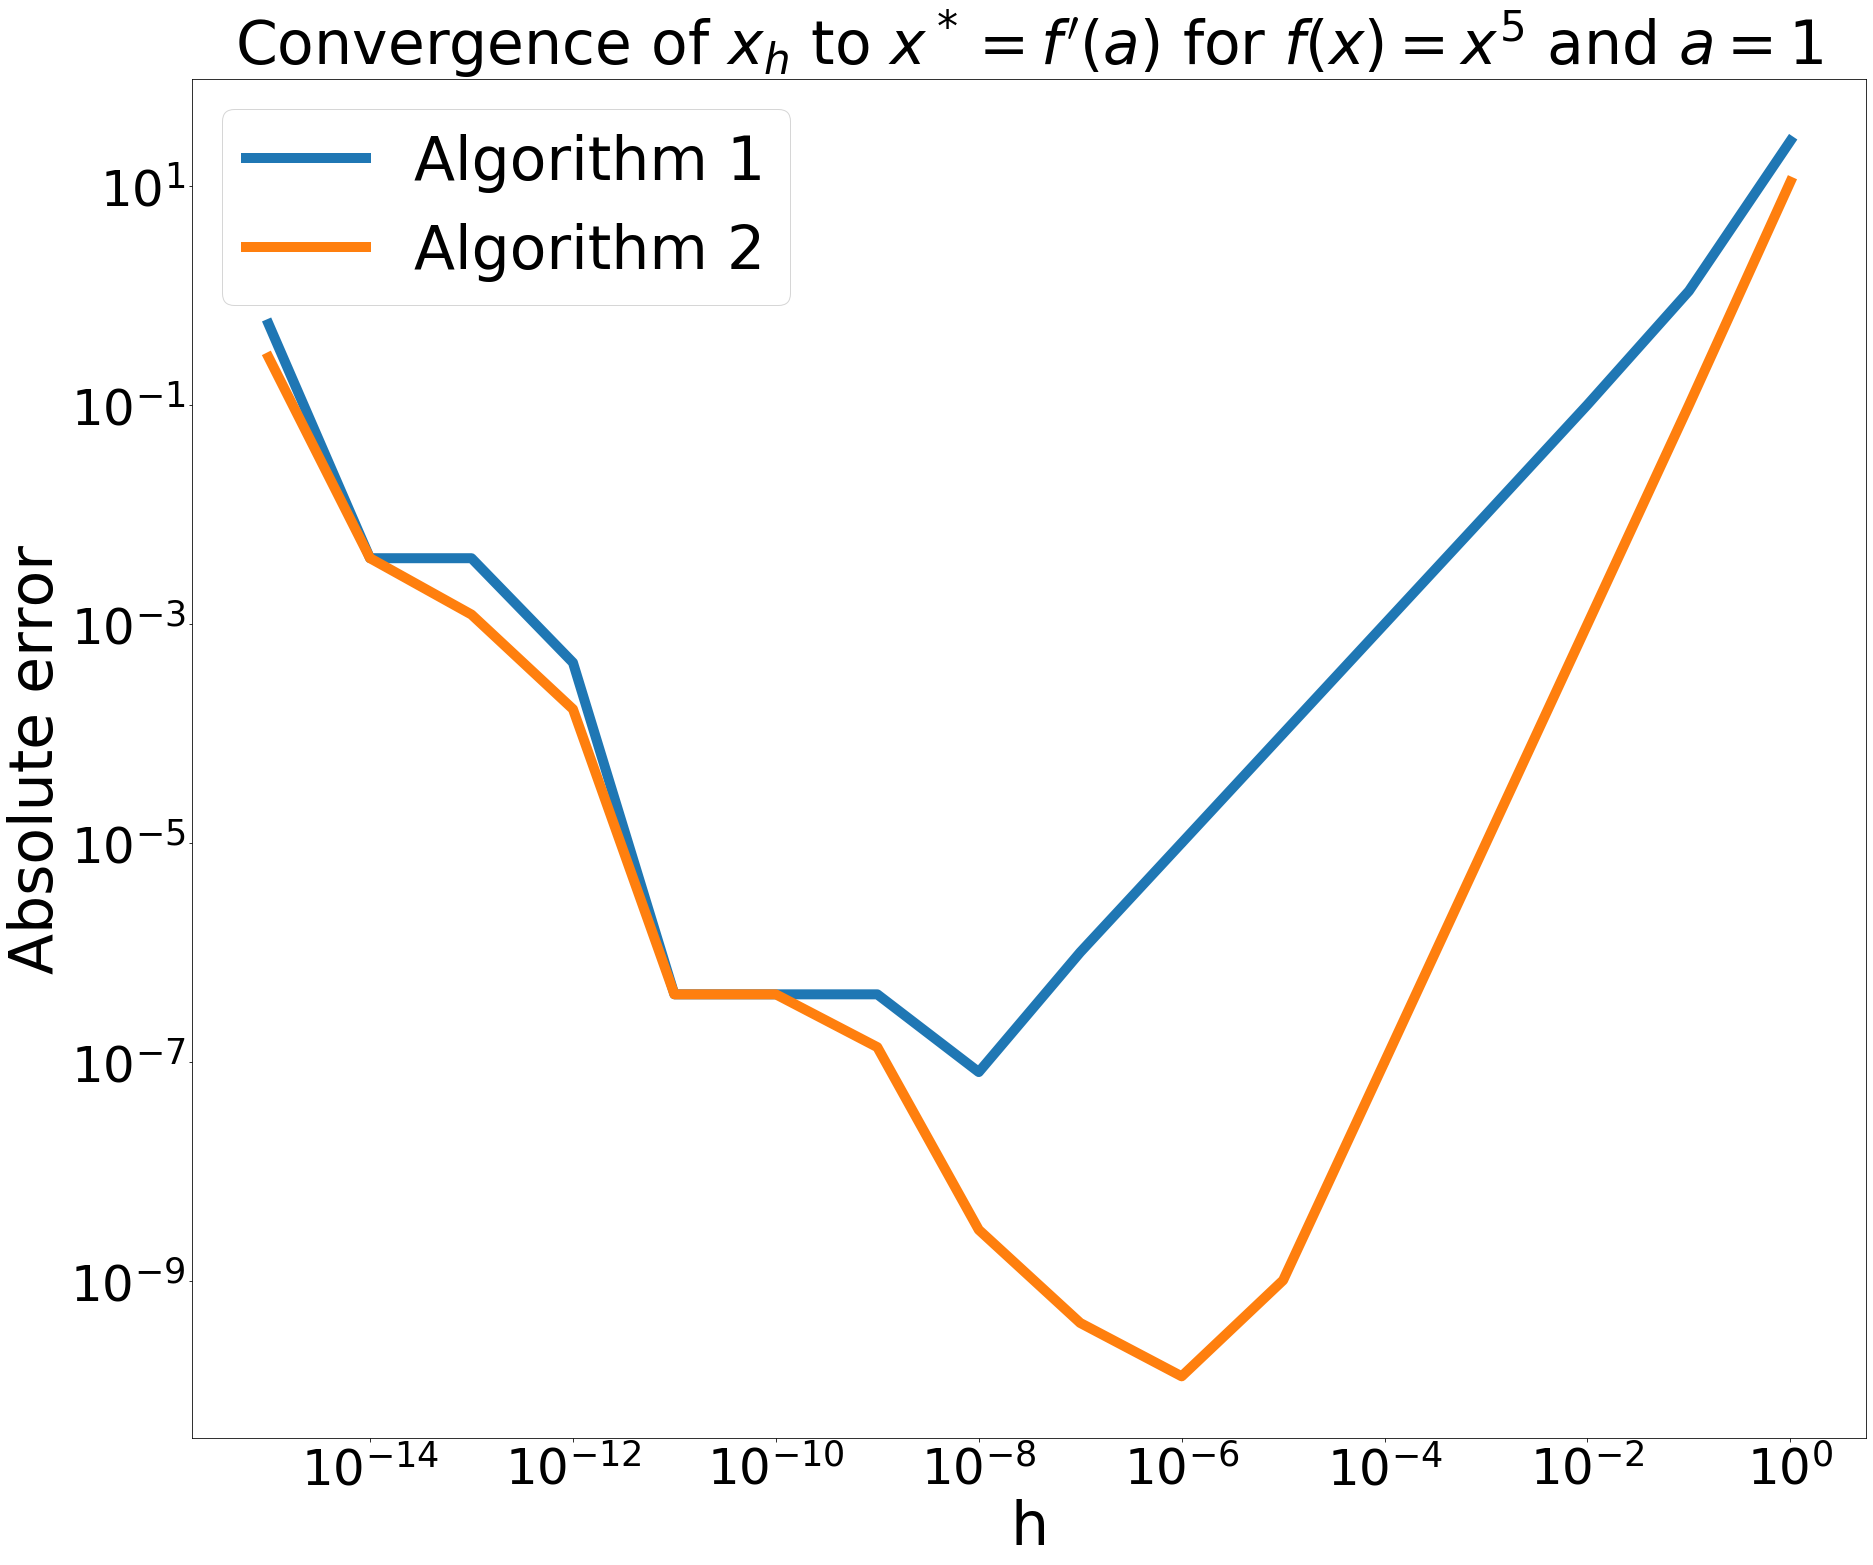

In [17]:
a = 1

n = np.arange(16)
h = 10.**(-n) #sequence of h = [1, 1e-1, 1e-2 ... 1e-5]

Der1 = ApproxDerivative1(f, a, h)
Err1 = abs(Der1 - 5.)

Der2 = ApproxDerivative2(f, a, h)
Err2 = abs(Der2 - 5.)

# plot of the errors versus h     
fig = plt.figure(figsize=(30, 25))
plt.loglog(h, Err1, linewidth=10, marker="o", label="Algorithm 1")
plt.loglog(h, Err2, linewidth=10, marker="o", label="Algorithm 2")
plt.legend(loc='upper left', fontsize=60)
plt.xlabel('h', fontsize=60)
plt.ylabel('Absolute error', fontsize=60)
plt.title('Convergence of $x_h$ to $x^*=f\'(a)$ for $f(x)=x^5$ and $a=1$', fontsize=60)

plt.show()


In [1]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom_slides.css").read()
    return HTML(styles)
css_styling()